The Detection and Recognition algorithmn


In [5]:
# This is a test to see if haar classifier is working
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D as conv, MaxPooling2D as m2d,Dense as dense,Flatten as flat, Dropout as drop
from tensorflow.keras.metrics import Precision, BinaryAccuracy, Recall
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import cv2 as cv
import os

face_classifier = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")


if face_classifier.empty():
    print("Error: Could not load Haar cascade classifier.")
    exit()


image_path ="Data\Random_Faces\\face_0.jpg"


image = cv.imread(image_path)


if image is None:
    print(f"Error: Could not read image from {image_path}")
    exit()


gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


faces = face_classifier.detectMultiScale(
    gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)
)


print(f"Faces detected: {faces}")


if len(faces) == 0:
    print("No faces detected.")
else:

    for (x, y, w, h) in faces:
        cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv.imshow('Detected Faces', image)
    cv.waitKey(0)
    cv.destroyAllWindows()

video=cv.VideoCapture(0)

face_id = 0

output_dir = 'Data//Detected_Faces'
os.makedirs(output_dir, exist_ok=True)


Faces detected: [[ 41  47 546 546]]


In [30]:
#From here we make the recognition model


data= tf.keras.utils.image_dataset_from_directory("Data",shuffle=True)
data=data.shuffle(buffer_size=2071)


Found 2245 files belonging to 2 classes.


In [31]:
data_iterator=data.as_numpy_iterator()

batch=data_iterator.next()


batch[0].shape

(32, 256, 256, 3)

In [32]:
data=data.map(lambda x,y:(x/250,y))
scaled_data=data.as_numpy_iterator()

batch=scaled_data.next()
batch[0].shape

(32, 256, 256, 3)

In [33]:
train=data.take(3)
test=data.skip(3).take(5)
val=data.skip(8).take(2)

In [34]:


model=Sequential()

#Section 1
model.add(conv(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(m2d())
model.add(conv(32,(3,3),1, activation='relu'))
model.add(m2d())
model.add(conv(12, (3,3),1, activation='relu'))
model.add(flat())
model.add(dense(256, activation='relu'))
model.add(dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 12)        3468      
                                                                 
 flatten_2 (Flatten)         (None, 43200)            

In [35]:
logdir='logs'
tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logdir)
Trained_model=model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard])

Epoch 1/10
3/3 [==============================] - 14s 3s/step - loss: 0.9456 - accuracy: 0.5000 - val_loss: 0.5691 - val_accuracy: 0.5469
Epoch 2/10
3/3 [==============================] - 8s 2s/step - loss: 0.3729 - accuracy: 0.7812 - val_loss: 0.2667 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 0.2259 - accuracy: 1.0000 - val_loss: 0.2260 - val_accuracy: 0.9375
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.0836 - accuracy: 0.9896 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 7s 2s/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9844
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6054 - val_accuracy: 0.9688
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 1.7913e-04 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9844
Epoch 8/10
3/3 [====================

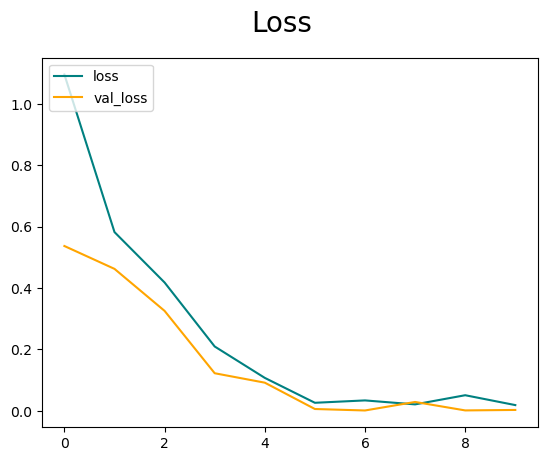

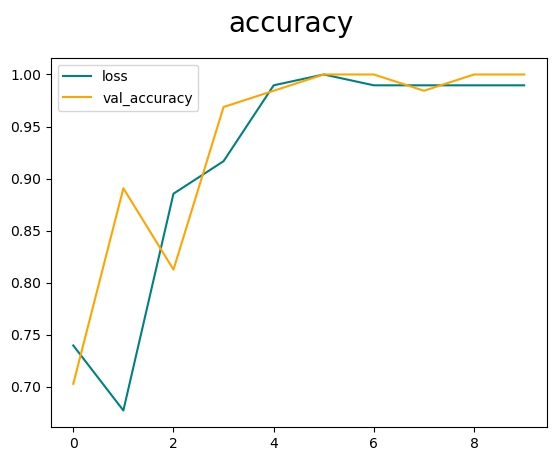

In [22]:
fig1 = plt.figure()
plt.plot(Trained_model.history['loss'], color='teal', label='loss')
plt.plot(Trained_model.history['val_loss'], color='orange', label='val_loss')
fig1.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")


fig2 = plt.figure()
plt.plot(Trained_model.history['accuracy'], color='teal', label='loss')
plt.plot(Trained_model.history['val_accuracy'], color='orange', label='val_accuracy')
fig2.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")

plt.show()
plt.show()

In [36]:


precision=Precision()
accuracy=BinaryAccuracy()
recall=Recall()
len(test)
for batch in test:
    x, y= batch
    prediction=model.predict(x)
    precision.update_state(y,prediction)
    accuracy.update_state(y,prediction)
    recall.update_state(y,prediction)

print(f"Precision:{precision.result().numpy()}, Accuracy:{accuracy.result().numpy()}, Recall:{recall.result().numpy()}")
#model.save('my_model.keras')

1/1 [==============================] - 0s 158ms/step
Precision:0.95652174949646, Accuracy:0.9750000238418579, Recall:1.0


In [24]:



def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0  
    return img_array

# Paths to images
img_path1 = 'Face-detection-algorithmn\\Data\\Random_Faces\\face_2.jpg'
img_path2 = 'Face-detection-algorithmn\\Data\\Detected_Faces\\face_2.jpg'
target_size = (256, 256)  

# Preprocess the first image
img_array1 = preprocess_image(img_path1, target_size)

# Make a prediction for the first image
predictions1 = model.predict(img_array1)
print(f'Raw model predictions for img_path1: {predictions1}')
predicted_class1 = 1 if predictions1[0][0] > 0.5 else 0
print(f'Predicted class for img_path1: {predicted_class1}')

# Preprocess the second image
img_array2 = preprocess_image(img_path2, target_size)

# Make a prediction for the second image
predictions2 = model.predict(img_array2)
print(f'Raw model predictions for img_path2: {predictions2}')
predicted_class2 = 1 if predictions2[0][0] > 0.5 else 0
print(f'Predicted class for img_path2: {predicted_class2}')



1/1 [==============================] - 0s 153ms/step
Raw model predictions for img_path1: [[0.99999917]]
Predicted class for img_path1: 1
1/1 [==============================] - 0s 68ms/step
Raw model predictions for img_path2: [[0.00039517]]
Predicted class for img_path2: 0


In [42]:

#From here we just test the model to see if they can recognize people live


def preprocess_frame(detected_face, target_size):
    # Resize the detected face to the target size
    img = cv.resize(detected_face, target_size)
    
    # Convert BGR to RGB (if using OpenCV to load images)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # Convert the resized image to array
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    
    # Scale pixel values to [0, 1]
    img_array = img_array / 255.0
    
    return img_array
name="Pishi"

while(True):
    ret,frame=video.read()


    grey=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
    grey, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 4)

    for (x, y, w, h) in faces:
       
        detected_face = frame[y:y+h, x:x+w]
        img_array=preprocess_frame(detected_face,(255,255))
        prediction=model.predict(img_array)
        predicted_class = 1 if prediction[0][0] > 0.5 else 0

        text_position = (x, y - 10)  
        if y - 10 < 10:  
            text_position = (x, y + 10)
        not_name="Unknown"


        if(predicted_class==0):
            text_position = (x, y - 10)  
            cv.putText(frame, name, text_position, cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv.LINE_AA)
        else:
            cv.putText(frame, not_name, text_position, cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv.LINE_AA)


        # Increment face ID counter
        face_id += 1
    cv.imshow('frame',frame)
    if cv.waitKey(1) & 0xFF == ord('q'): 
        break

video.release() 

cv.destroyAllWindows()

1/1 [==============================] - 0s 51ms/step
